## Modelos Não Supervisionados

Modelos de aprendizado não supervisionado são técnicas de machine learning que analisam dados sem **rótulos** ou respostas pré-definidas. Ou seja, o algoritmo não recebe exemplos do tipo “entrada → saída correta” conforme o modelo supervisionado, mas sim um conjunto de dados brutos e precisa identificar padrões, estruturas ou relações ocultas por conta própria.

Esses modelos são muito usados quando não se sabe exatamente o que procurar nos dados ou quando rotular informações é caro e demorado.

Esse tipo de aprendizado é comum em tarefas como agrupamento (clustering), onde dados semelhantes são organizados em grupos, e redução de dimensionalidade, que simplifica grandes volumes de dados mantendo suas características principais.

---

### K-Means

O K-Means é um algoritmo de aprendizado não supervisionado usado para **agrupamento de dados**. Ele funciona separando os dados em **clusters**, de forma que os elementos dentro de cada grupo sejam semelhantes.

O algoritmo define centros (centroides) para cada grupo e ajusta esses centros iterativamente para minimizar a distância entre os dados e o centro do seu respectivo cluster.

In [19]:
# Ignorando avisos
import warnings

warnings.filterwarnings("ignore")

In [1]:
""" Obtenção dos dados """

from sklearn.datasets import load_iris

# Carregando o dataset Iris
iris = load_iris()
X = iris.data # sem rótulos

In [2]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Como não existem rótulos para serem comparados e treinado, modelos de aprendizado não supervisionados geralmente não se separam em dados de treinos e teste.

In [8]:
""" Treinamento do modelo K-Means """

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def modelo_kmeans(X, k = 3):
    # Criando o modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Treinando o modelo
    kmeans.fit(X)

    # Obtendo os clusters atribuídos
    labels = kmeans.labels_

    # Visualização
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel("Comprimento da sépala")
    plt.ylabel("Largura da sépala")
    plt.title("Agrupamento com K-Means (Iris Dataset)")
    plt.show()

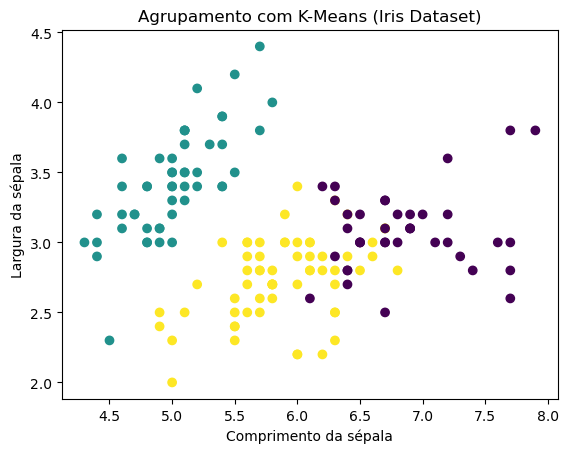

In [20]:
modelo_kmeans(X, 3)

Conforme o gráfico acima, podemos perceber os diferentes clusters com base nas cores e a proximidade deles.

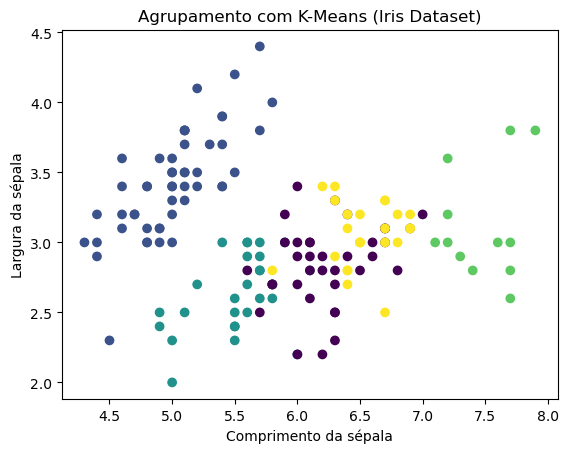

In [21]:
modelo_kmeans(X, 5)

Conforme observado, quanto maior o número de clusters, menos nítida se torna a separação entre os agrupamentos, dificultando a identificação dos clusters.

---

Algumas das formas de identificar um bom número de clusters incluem o uso do **Silhouette Score** e do **Método do Cotovelo**, que analisam a **dispersão dos pontos** e as distâncias entre eles para determinar o valor mais adequado de K. Esses métodos buscam encontrar uma segmentação que seja bem definida, equilibrando a qualidade do agrupamento sem torná-lo redundante.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testando diferentes valores de K
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels)
    print(f"K = {k} | Silhouette Score = {score:.3f}")

K = 2 | Silhouette Score = 0.681
K = 3 | Silhouette Score = 0.551
K = 4 | Silhouette Score = 0.498
K = 5 | Silhouette Score = 0.493
K = 6 | Silhouette Score = 0.368
K = 7 | Silhouette Score = 0.354
K = 8 | Silhouette Score = 0.345
K = 9 | Silhouette Score = 0.316
K = 10 | Silhouette Score = 0.301
K = 11 | Silhouette Score = 0.269
K = 12 | Silhouette Score = 0.263
K = 13 | Silhouette Score = 0.260
K = 14 | Silhouette Score = 0.263
K = 15 | Silhouette Score = 0.253


No Silhouette Score, é possível observar que o melhor resultado ocorre em K = 2, seguido por uma queda em K = 3. A partir desse ponto, os valores diminuem de forma contínua, indicando perda na qualidade dos agrupamentos.

Assim, os valores 2 ou 3 podem ser considerados os mais adequados para esse modelo, dependendo do nível de detalhamento desejado.

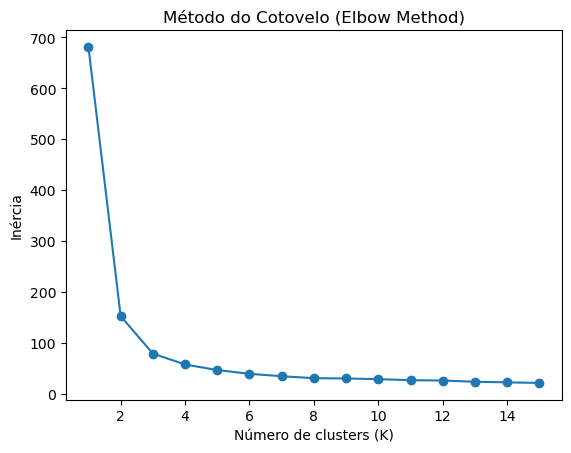

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para armazenar a inércia
inertias = []

# Testando diferentes valores de K
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 16), inertias, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo (Elbow Method)")
plt.show()

O Método de Elbow segue uma linha semelhante ao do Silhouette Score porém de uma forma mais visual, onde podemos ver a queda acentuada da inércia no K = 2 e K = 3.

### Clustering Hierárquico

In [ ]:
pass

### PCA

In [ ]:
pass